<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/PDE/LeastSquares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least-squares weighted residual method

The one-dimensional heat equation:

$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $

Domain: $( x \in [0, L])$ and $(t \geq 0)$

Boundary conditions: $( u(0, t) = u(L, t) = 0 )$

Initial condition: $( u(x, 0) = \sin(\pi x) )$.


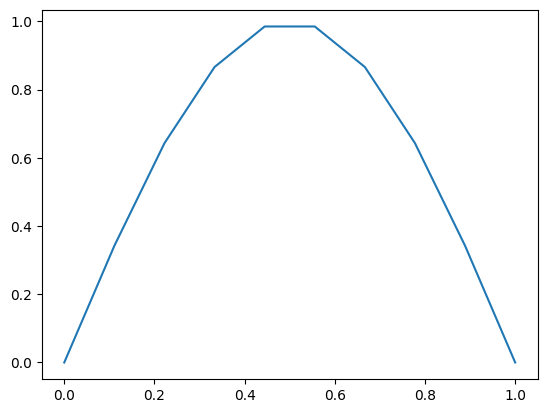

In [1]:
import numpy as np
import scipy.linalg as la

# Parameters
L = 1.0         # Length of the domain
alpha = 1.0     # Diffusion coefficient
N = 10          # Number of spatial points
M = 100         # Number of time points
T = 0.1         # Total time

# Discretization
x = np.linspace(0, L, N)
dx = x[1] - x[0]
t = np.linspace(0, T, M)
dt = t[1] - t[0]

# Initial condition
u0 = np.sin(np.pi * x)

# Sine basis functions (excluding first and last points to satisfy boundary conditions)
def basis_function(k, x):
    return np.sin(k * np.pi * x / L)

# Compute coefficients for initial condition
def initial_coefficients(u0, N):
    a = np.zeros(N-1)
    for k in range(1, N):
        a[k-1] = 2.0 / L * np.trapz(u0 * basis_function(k, x), x)
    return a

# Time-stepping using Crank-Nicolson method
def crank_nicolson_step(a, dt, alpha, N):
    A = np.zeros((N-1, N-1))
    for i in range(1, N):
        for j in range(1, N):
            if i == j:
                A[i-1, j-1] = 1 + alpha * (np.pi * i / L) ** 2 * dt / 2
            else:
                A[i-1, j-1] = 0

    B = np.zeros((N-1, N-1))
    for i in range(1, N):
        for j in range(1, N):
            if i == j:
                B[i-1, j-1] = 1 - alpha * (np.pi * i / L) ** 2 * dt / 2
            else:
                B[i-1, j-1] = 0

    a_new = la.solve(A, B.dot(a))
    return a_new

# Initial coefficients
a = initial_coefficients(u0, N)

# Time-stepping
u = np.zeros((M, N))
u[0, :] = u0
for n in range(1, M):
    a = crank_nicolson_step(a, dt, alpha, N)
    u[n, :] = np.zeros(N)
    for k in range(1, N):
        u[n, :] += a[k-1] * basis_function(k, x)

# Results
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot(x, u0)

def update(frame):
    line.set_ydata(u[frame, :])
    return line,

ani = FuncAnimation(fig, update, frames=range(M), blit=True)
plt.show()